In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_set = pd.read_csv("Desktop/practical2/train.csv", header=0)

In [3]:
train_set.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [4]:
len(train_set)

300000

In [5]:
X_train = train_set[train_set.columns[20:31]]
X_train.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915
1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729
2,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452
3,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242
4,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960


In [6]:
y_train = train_set[["target"]]
y_train.head()

,target
0,0
1,0
2,0
3,0
4,1


In [7]:
test_set = pd.read_csv("Desktop/practical2/test.csv", header=0)

In [8]:
len(test_set)

200000

In [9]:
test_set.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [10]:
X_test = test_set[test_set.columns[20:31]]
X_test.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [11]:
#no target in test set
y_train['target'].value_counts()

0    220539
1     79461
Name: target, dtype: int64

In [12]:
y_train_0 = (y_train == 0)

In [13]:
y_train_1 = (y_train == 1)

In [14]:
#SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1, random_state=123)
sgd_clf.fit(X_train, y_train_0)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDClassifier(random_state=123, tol=1)

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_0, cv=10, scoring="accuracy") #over 73% accuracy

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConv

array([0.73513333, 0.73513333, 0.73513333, 0.73513333, 0.73513333,
       0.73513333, 0.73513333, 0.73513333, 0.73513333, 0.7351    ])

In [16]:
#Confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=10)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConv

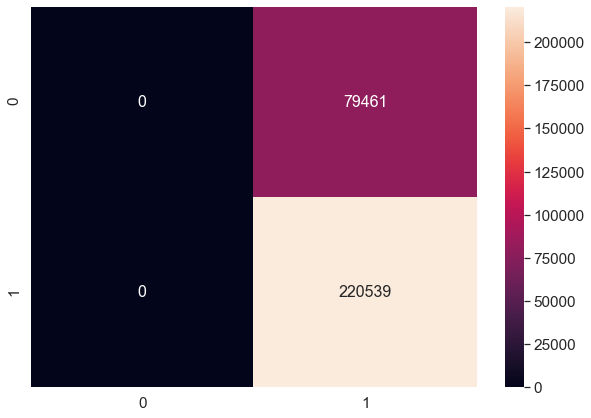

In [17]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_0, y_train_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1.4) # for label size
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 16}) # font size
plt.show()

#79461 digits not labelled as 0 but predicted as 0 (because these are 1's); 220539 digits predicted as 0 and labelled as 0

In [18]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_0, y_train_pred) #accuracy of positive predictions

0.73513

In [19]:
#Accuracy check

(cm[1, 1] + cm[0, 0]) / (cm[1, 1] + cm[1, 0] + cm[0, 1] + cm[0, 0])

0.73513

In [20]:
#Sensitivity, True Positive Rate, Recall
recall_score(y_train_0, y_train_pred) #1 because no false negatives
#Specificity 0

1.0

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_0, y_train_pred)

0.8473486136485451

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_0, cv=10,
                             method="predict")
#Only 2 class/es in training fold, but 1 in overall dataset. This is not supported for decision_function with imbalanced folds. To fix this, use a cross-validation technique resulting in properly stratified folds. I used predict_function

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConv

In [23]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

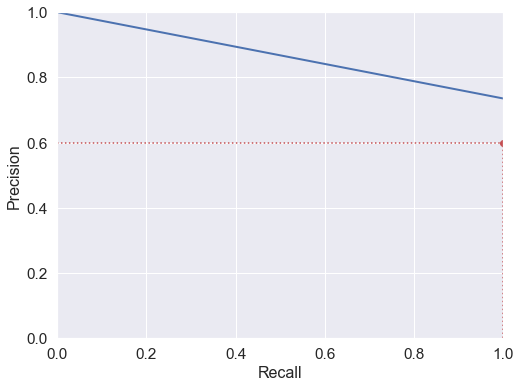

In [24]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)


recall_60_precision = recalls[np.argmax(precisions >= 0.60)]
threshold_60_precision = thresholds[np.argmax(precisions >= 0.60)]
    
    
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_60_precision, recall_60_precision], [0., 0.60], "r:")
plt.plot([0.0, recall_60_precision], [0.60, 0.60], "r:")
plt.plot([recall_60_precision], [0.60], "ro")
plt.show()

In [25]:
threshold_70_precision = thresholds[np.argmax(precisions >= 0.70)]
threshold_70_precision #given the anomaly of this dataset for binary classifiers, no precision higher than 73% is allowed

True

In [26]:
y_train_pred_70 = (y_scores >= threshold_70_precision)
y_train_pred_70

array([ True,  True,  True, ...,  True,  True,  True])

In [27]:
precision_score(y_train_0, y_train_pred_70)

0.73513

In [28]:
recall_score(y_train_0, y_train_pred_70)

1.0

In [29]:
#Nonsense to draw ROC because recall (TPR) is 1 FPR is 0 (optimal..)

In [30]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=5, random_state=123)
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=10,
                                    method="predict")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:946: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:946: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:946: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Pytho

In [31]:
from sklearn.metrics import roc_curve
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_0, y_pred_forest)

In [32]:
fpr_forest

array([0.        , 0.55785857, 1.        ])

In [33]:
tpr_forest

array([0.        , 0.88889493, 1.        ])

In [34]:
thresholds_forest

array([2, 1, 0])

In [35]:
fpr_60 = fpr[np.argmax(tpr >= recall_60_precision)]           
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_60)]

def plot_roc_curve(fpr, tpr, label=None):
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_60, fpr_60], [0., recall_60_precision], "r:")
plt.plot([0.0, fpr_60], [recall_60_precision, recall_60_precision], "r:")
plt.plot([fpr_60], [recall_60_precision], "ro")
plt.plot([fpr_60, fpr_60], [0., recall_for_forest], "r:")
plt.plot([fpr_60], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()    

IndentationError: expected an indented block (<ipython-input-35-6d84c911e260>, line 5)

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_0, y_scores)

0.5

In [39]:
roc_auc_score(y_train_0, y_pred_forest) #compare!

0.6655181812765152

In [40]:
#11 is n. of feature in X_train/X_test. I sampled randomly 11 values as x's on which making predictions via SVC 
some_values = X_train["cont0"].sample(n=11, replace=True)
print(some_values)

179664    0.292113
31895     0.510698
256624    0.667114
184015    0.867228
296637    0.276740
174693    0.886901
24283     0.405051
82051     0.879519
252948    0.714051
147029    0.485744
267830    0.421430
Name: cont0, dtype: float64


In [41]:
#Multicalss classification - Support Vector Machine classifier
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=123)
svm_clf.fit(X_train[:300], y_train[:300]) # y_train, not y_train_0
svm_clf.predict([some_values])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0])

In [43]:
some_values

179664    0.292113
31895     0.510698
256624    0.667114
184015    0.867228
296637    0.276740
174693    0.886901
24283     0.405051
82051     0.879519
252948    0.714051
147029    0.485744
267830    0.421430
Name: cont0, dtype: float64

In [42]:
value_col0_scores = svm_clf.decision_function([some_values])
value_col0_scores

array([-0.92148038])

In [44]:
np.argmax(value_col0_scores)

0

In [45]:
svm_clf.classes_

array([0, 1])

In [46]:
svm_clf.classes_[0]

0

In [47]:
#One vs Rest classifier
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=123))
ovr_clf.fit(X_train[:300], y_train[:300])
ovr_clf.predict([some_values])

array([0])

In [48]:
len(ovr_clf.estimators_)

1

In [49]:
# Training SVM
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_values])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0])

In [50]:
sgd_clf.decision_function([some_values])

array([-1.16525292])

In [51]:
cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring="accuracy")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConv

array([0.73513333, 0.73513333, 0.73513333, 0.73513333, 0.73513333,
       0.73513333, 0.73513333, 0.73513333, 0.73513333, 0.7351    ])

In [ ]:
#Multiclass Confusion Matrices & Error Analysis?? Useless

In [68]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=10)
knn_clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10, weights='distance')

In [69]:
y_knn_pred = knn_clf.predict(X_test)
y_knn_pred

array([0, 0, 0, ..., 1, 0, 0])

In [67]:
#X_test has 200k obs, so predictions on this test set will not be 300k as X_train
y_rnd_obs = y_train.sample(n=200000, replace=False)

from sklearn.metrics import accuracy_score
accuracy_score(y_rnd_obs, y_knn_pred)

0.636475

In [62]:
#Multilabel classification (not really useful given 0-1 values in target y_train)
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train > 0)
y_train_0 = (y_train == 0)
y_multilabel = np.c_[y_train_large, y_train_0]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [63]:
knn_clf.predict([some_values])

array([[False,  True]])

In [64]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=10)
y_train_knn_pred

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [False,  True]])

In [65]:
f1_score(y_multilabel, y_train_knn_pred, average= "macro")

0.6800532039574854

In [72]:
#Logistic regression classifier
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=123)
log_reg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=123)

In [79]:
#11 values randomly from column n.8 of X_train (just to vary)
some_values_2 = X_train["cont9"].sample(n=11, replace=True)
print(some_values_2)

285540    0.332322
74684     0.574808
171269    0.432751
13385     0.583819
66175     0.538583
224993    0.334610
122581    0.576292
110698    0.316163
21791     0.582412
281949    0.902757
217979    0.593063
Name: cont9, dtype: float64


In [80]:
log_reg.predict([some_values_2])

array([0])

In [ ]:
#Graph???

In [81]:
#Softmax (Multinomial) Regression classifier
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=2, random_state=123)
softmax_reg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=2, multi_class='multinomial', random_state=123)

In [ ]:
#Graph??



In [82]:
softmax_reg.predict([some_values_2])

array([0])

In [83]:
softmax_reg.predict_proba([some_values_2])

array([[0.75936617, 0.24063383]])